# Data Preparation

* Data Discovery
* Exploratory Data Analysis
* Assumed Defition of High Performing Employee
* Feature Transformation
* Feature Selection

In [48]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/learner/Downloads/hr_data.txt')

## Data Discovery

In [3]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 11)

In [14]:
df.keys()

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [18]:
df.describe()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales                  14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [9]:
#Check for null values
df.isnull().sum() #---No null

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
#Check for duplicates
df.duplicated().sum()

0

In [20]:
#Check data types of the columns
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [26]:
#Do further check on the object types
df['sales'].unique(), df['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

# Exploratory Data Analysis

In [27]:
#Classifying Variables
target = df[]

SyntaxError: invalid syntax (<ipython-input-27-28433d724773>, line 2)

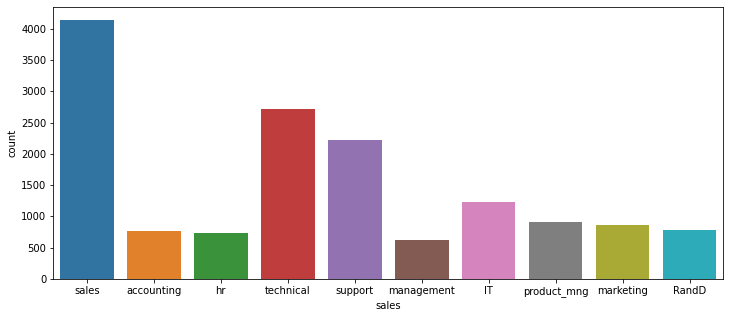

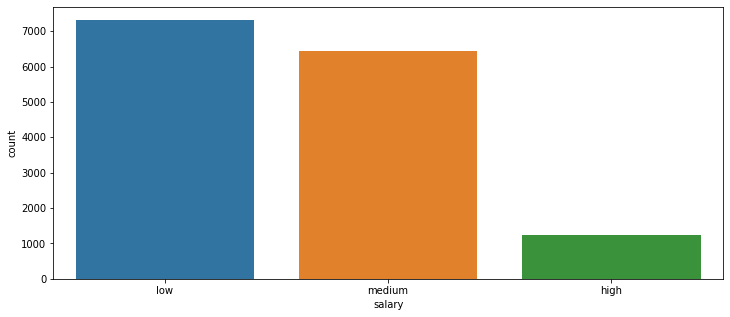

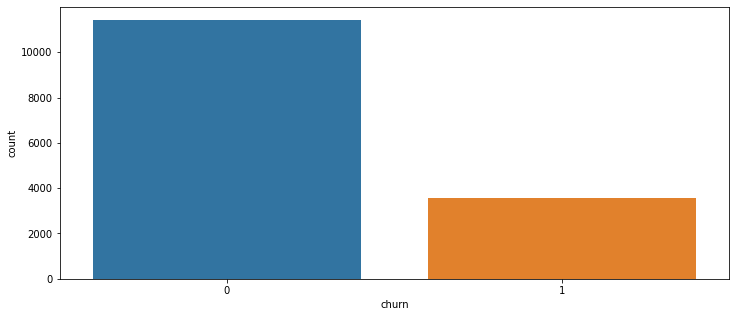

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
for i in ['sales','salary','churn']:
    sns.countplot(df[i])
    plt.show()

In [46]:
continuous_variables = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

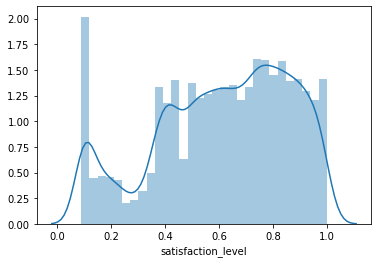

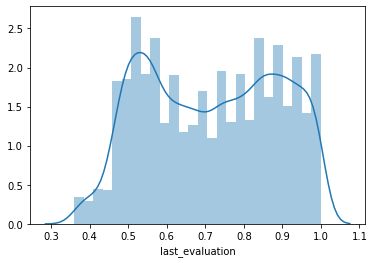

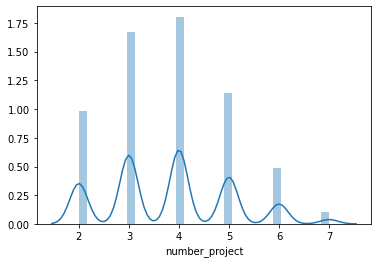

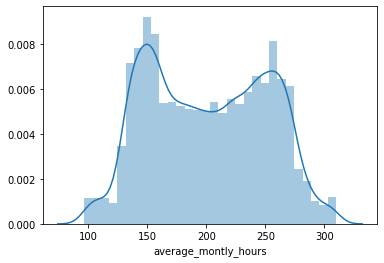

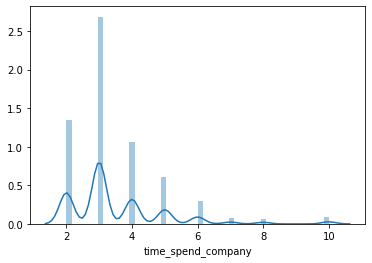

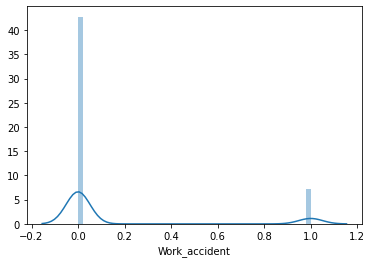

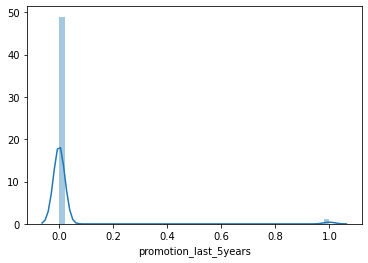

In [50]:
for i in continuous_variables:
    sns.distplot(df[i])
    plt.show()

## Assumed Definition of High Performing Employee

Top Performing employees are assumed to be those who 
1. scored 80% and above, and 
2. have completed more that 3 projects

In [52]:
df[df['last_evaluation'] >= 0.80].shape[0], df[df['number_project'] > 3].shape[0]


(5740, 8556)

In [54]:
#High performing Employees
new_df = df[(df['last_evaluation'] >= 0.80) & (df['number_project'] > 3)]
new_df

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
7,7,0.92,0.85,5,259,5,0,1,0,sales,low
8,8,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14986,14986,0.85,0.85,4,247,6,0,1,0,technical,low
14990,14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,14991,0.09,0.81,6,257,4,0,1,0,support,low
14993,14993,0.76,0.83,6,293,6,0,1,0,support,low


In [60]:
#Non High performing employees
non_perf = df[~((df['last_evaluation'] >= 0.80) & (df['number_project'] > 3))]
non_perf

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
5,5,0.41,0.50,2,153,3,0,1,0,sales,low
6,6,0.10,0.77,6,247,4,0,1,0,sales,low
9,9,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14992,14992,0.40,0.48,2,155,3,0,1,0,support,low
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low


In [69]:
#Percentage of High Performing Employees
perc_high_emp = (new_df.shape[0] / df.shape[0]) * 100
perc_high_emp

27.415161010734053

## Feature Transformation

In [70]:
#Convert Categorical variables to numerical variables
new_df['salary'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [71]:
new_df['salary'] = new_df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

/home/learner/Documents/unit5_project/unit5project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
#QC
new_df['salary'].unique()

array([2, 1, 3])

In [73]:
#Use get_dummies to convert departments column to numerical values
new_df = pd.get_dummies(new_df, columns = ['sales'], prefix =['department'])

In [75]:
#QC
new_df.head(3)

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
1,1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [76]:
new_df.shape

(4112, 20)

## Feature Selection

* Feature Importance
* Correlation

In [77]:
#FEATURE IMPORTANCE

#Import Tree Based Classifier
from sklearn.ensemble import ExtraTreesClassifier

In [78]:
#Set X, y Variables
X = new_df.drop(['churn','id'], axis = 1)
y = new_df['churn']

In [79]:
#Instantiate the classifier class
mock_model = ExtraTreesClassifier()

In [80]:
#fit on the variables
mock_model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [81]:
mock_model.feature_importances_

array([0.19148836, 0.04913991, 0.15300852, 0.19623518, 0.31147245,
       0.02370385, 0.00592846, 0.0253345 , 0.0037942 , 0.00377715,
       0.0037963 , 0.00425387, 0.00336382, 0.00270488, 0.00437966,
       0.00657365, 0.0050779 , 0.00596734])

In [110]:
ft_var = pd.Series(mock_model.feature_importances_, index=X.columns).nlargest(7)
ft_var

time_spend_company      0.311472
average_montly_hours    0.196235
satisfaction_level      0.191488
number_project          0.153009
last_evaluation         0.049140
salary                  0.025335
Work_accident           0.023704
dtype: float64

In [111]:
ft_var_cols = list(ft_var.index)
ft_var_cols

['time_spend_company',
 'average_montly_hours',
 'satisfaction_level',
 'number_project',
 'last_evaluation',
 'salary',
 'Work_accident']

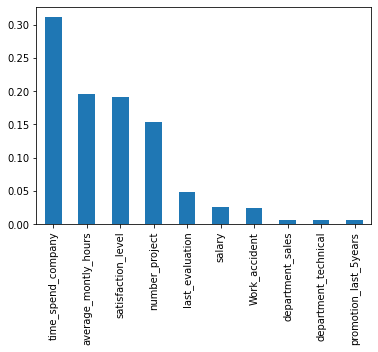

In [105]:
#Visualize feature importance
pd.Series(mock_model.feature_importances_, index=X.columns).nlargest(10).plot(kind = 'bar')
plt.show()

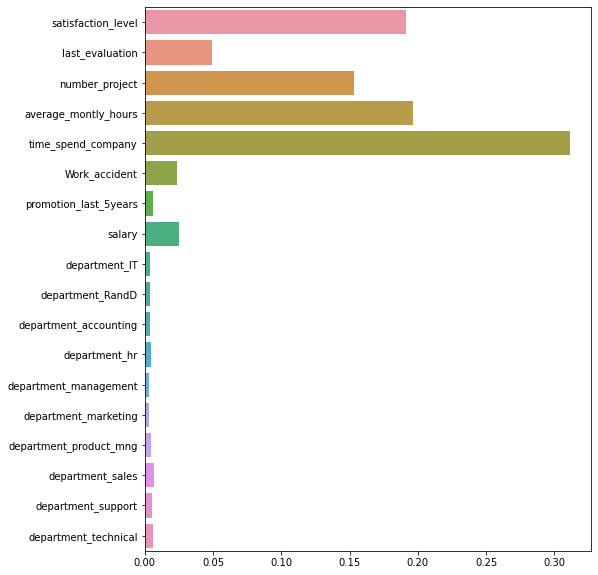

In [134]:
sns.barplot(y= X.columns, x = mock_model.feature_importances_)
rcParams['figure.figsize'] = 8, 10

In [102]:
#CORRELATION

corr_var = new_df.corr()['churn'].abs().sort_values(ascending = False)[:10]
corr_var

churn                    1.000000
average_montly_hours     0.568372
number_project           0.501633
time_spend_company       0.429484
satisfaction_level       0.304891
Work_accident            0.186979
salary                   0.177143
id                       0.140755
promotion_last_5years    0.104443
last_evaluation          0.077717
Name: churn, dtype: float64

In [104]:
corr_var_cols = list(corr_var.index)
corr_var_cols

['churn',
 'average_montly_hours',
 'number_project',
 'time_spend_company',
 'satisfaction_level',
 'Work_accident',
 'salary',
 'id',
 'promotion_last_5years',
 'last_evaluation']

In [123]:
final_features = set(ft_var_cols + corr_var_cols) - set(['id'])
final_features

{'Work_accident',
 'average_montly_hours',
 'churn',
 'last_evaluation',
 'number_project',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company'}

In [126]:
prep_data = new_df[final_features]
prep_data

,salary,satisfaction_level,time_spend_company,average_montly_hours,Work_accident,number_project,churn,last_evaluation,promotion_last_5years
1,2,0.80,6,262,0,5,1,0.86,0
2,2,0.11,4,272,0,7,1,0.88,0
3,1,0.72,5,223,0,5,1,0.87,0
7,1,0.92,5,259,0,5,1,0.85,0
8,1,0.89,5,224,0,5,1,1.00,0
...,...,...,...,...,...,...,...,...,...
14986,1,0.85,6,247,0,4,1,0.85,0
14990,1,0.89,5,228,1,5,1,0.88,0
14991,1,0.09,4,257,0,6,1,0.81,0
14993,1,0.76,6,293,0,6,1,0.83,0


In [127]:
prep_data.to_csv('prep_data.csv', index = False)